2020-02-01


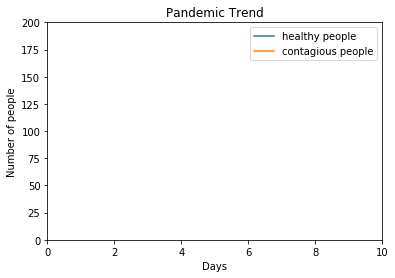

2020-02-02


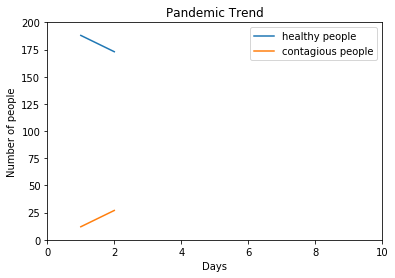

2020-02-03


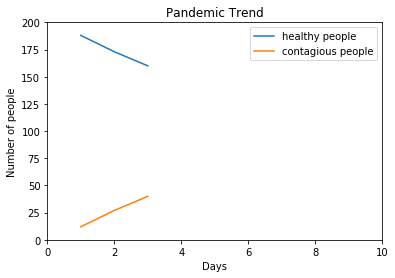

2020-02-04


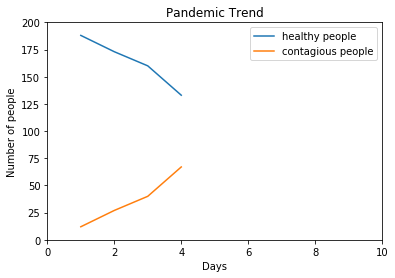

2020-02-05


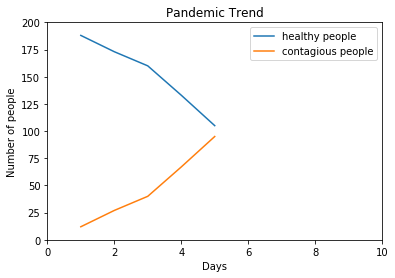

2020-02-06


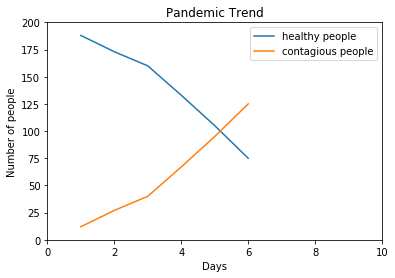

2020-02-07


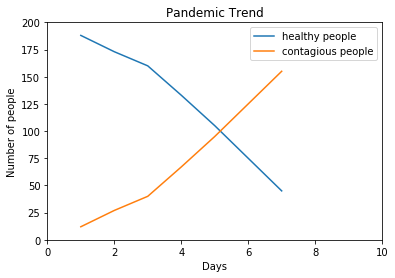

2020-02-08


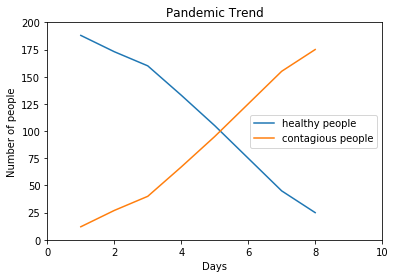

2020-02-09


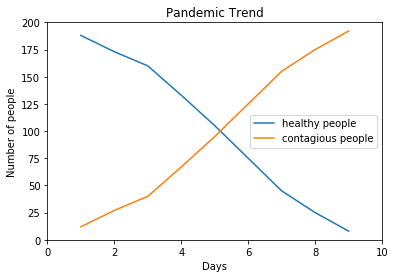

2020-02-10


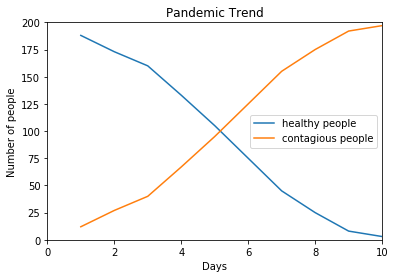

[12, 27, 40, 67, 95, 125, 155, 175, 192, 197]

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date, datetime
import folium
from folium.plugins import TimestampedGeoJson
import pandas as pd


day_contagious = []
patients = []
time = []
coordinate = []

class Patient:

    def __init__(self, first_name, last_name, health):
        self.first_name = first_name
        self.last_name = last_name
        self.health = health
        self.friends = []
        self.location = []

    def add_friend(self, friend_person):
        self.friends.append(friend_person)

    def add_location(self, location):
        self.location = location

    def get_friends(self):
        return self.friends
    
    def get_location(self):
        return self.location
    
    def get_name(self):
        return self.first_name + self.last_name

    def get_health(self):
        return self.health

    def infect(self, viral_load):
        if self.health <= 29:
            self.health -= 0.1 * viral_load

        elif 29 < self.health < 50:
            self.health -= viral_load

        elif self.health >= 50:
            self.health -= 2 * viral_load

        if self.health < 0:
            self.health = 0

    def is_contagious(self):
        if round(self.health, 0) < 50:
            return True
        else:
            return False

    def sleep(self):
        if self.health < 96:
            self.health += 5
        else:
            self.health = 100

    def set_health(self, new_health):
        self.health = new_health
    
    def set_location(self, location):
        self.location = location
    
    def __str__(self):
        return self.first_name + " " + self.last_name + " " + str(self.health) + " " + self.health

    
def collect_data(start_date, end_date):
    for patient in patients:
        position = patient.get_location()
        coordinate.append(position)
        
    
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days) + 1):
        yield start_date + timedelta(n)

        
def load_patients(initial_health):
    f = open("/Users/MichaelFu/Desktop/a2_sample_set222.txt", "r")
    f1 = f.readlines()
    global patients
    patients = []

    for line in f1:
        line_split_list = line.split(":")
        patient_split_list = line_split_list[0].split()
        one_patient = Patient(patient_split_list[0], patient_split_list[1], initial_health)
        patients.append(one_patient)

    cur_index = 0
    for line in f1:
        line_split_list = line.split(":")
        all_patient_split_list = line_split_list[1].split(",")

        for patient_name in all_patient_split_list:
            single_patient_split_list = patient_name.split()
            name = single_patient_split_list[0].strip() + single_patient_split_list[1].strip()

            for patient in patients:
                if patient.get_name() == name:
                    patients[cur_index].add_friend(patient)
                    break
        cur_index += 1
    f.close()


def locate_patients():
    for patient in patients:
        south_boundary = -37.9656
        north_boundary = -37.8726
        east_boundary = 145.2330
        west_boundary = 145.0247
        location = [random.uniform(west_boundary, east_boundary), random.uniform(south_boundary, north_boundary)]
        patient.add_location(location)


def run_simulation(start_date, end_date, meeting_probability, patient_zero_health):  
    global coordinate
    total_contagious = []
    first_patient = patients[0]
    first_patient.set_health(patient_zero_health)
    day = 1
    h = []
    d = []
    
    for single_date in daterange(start_date, end_date):
        date = single_date.strftime('%Y-%m-%d')
        print(date)
        day_contagious = 0
        for man in patients:
            viral_load = 5 + ((man.get_health() - 25) ** 2) / 62
            friends = man.get_friends()
            for friend in friends:
                viral_load_friend = 5 + ((friend.get_health() - 25) ** 2) / 62
                r = random.randint(1, 100) / 100
                if meeting_probability >= r and man.is_contagious():
                    friend.infect(viral_load)
                if meeting_probability >= r and friend.is_contagious():
                    man.infect(viral_load_friend)
       
        for man in patients:
            if man.is_contagious():
                day_contagious += 1
                coordinate.append(man.get_location())
                time.append(date)
                
            man.sleep()
            
        total_contagious.append(day_contagious)
        
        healthy = 200 - day_contagious
        h.append(healthy)
        d.append(day)    
        plt.plot(d, h)
        plt.plot(d, total_contagious)
        plt.gca().legend(['healthy people', 'contagious people'])
        plt.xlim(0, 10)
        plt.ylim(0, 200)
        plt.xlabel("Days")
        plt.ylabel("Number of people")
        plt.title("Pandemic Trend")
        fig = plt.gcf()
        
        plt.show()
        
        file_name = 'day' + str(day) + '.png'
        fig.savefig(file_name)
        
        day += 1
    return total_contagious

coordinate = []
day_contagious = []
patients = []
time = []
load_patients(85)
locate_patients()
start_date = date(2020, 2, 1)
end_date = date(2020, 2, 10)
run_simulation(start_date, end_date, 0.8, 49)
